In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fnmatch import fnmatch
import pandas as pd
import numpy as np
import time

sns.set(font_scale=1.25, style='white')


color_names = ["black",
               "windows blue",
               "red",
               "amber",
               "faded green",
               "dusty purple",
               "orange",
               "clay",
               "pink",
               "greyish",
               "mint",
               "light cyan",
               "steel blue",
               "forest green",
               "pastel purple",
               "salmon",
               "dark brown"]

colors = sns.xkcd_palette(color_names)

In [56]:
# accumulate fit random seed in the /src director
pattern = "*.csv"
outfilenames = []
for path, subdirs, files in os.walk('../src/supervised_out/'):
    for name in files:
        if fnmatch(name, pattern):
            outfilenames.append(os.path.join(path, name)) 


dataframes = [pd.read_csv(df) for df in outfilenames]
if len(dataframes) > 0:
    supervised_coloredmnist = pd.concat(dataframes)
    supervised_coloredmnist.to_csv('colored_mnist_supervised_agg_'+str(int(time.time()*1e6))+'.csv', index=False)


In [57]:
# accumulate fit random seed in the /src director
pattern = "*.csv"
outfilenames = []
for path, subdirs, files in os.walk('../src/unsupervised_out/'):
    for name in files:
        if fnmatch(name, pattern):
            outfilenames.append(os.path.join(path, name)) 


dataframes = [pd.read_csv(df) for df in outfilenames]
if len(dataframes) > 0:
    unsupervised_coloredmnist = pd.concat(dataframes)
    unsupervised_coloredmnist.to_csv('colored_mnist_unsupervised_agg_'+str(int(time.time()*1e6))+'.csv', index=False)



In [58]:
dataframes 

[]

In [59]:
supervised_coloredmnist = pd.read_csv("colored_mnist_supervised_agg_1630545668607767.csv")
unsupervised_coloredmnist = pd.read_csv("colored_mnist_unsupervised_agg_1630545671406077.csv")

In [60]:
supervised_coloredmnist
print(list(supervised_coloredmnist))

['Unnamed: 0.1', 'Unnamed: 0', 'causalrep_train_accs', 'causalrep_test_accs', 'naive_train_accs', 'naive_test_accs', 'naive_vae_train_accs', 'naive_vae_test_accs', 'hidden_dim', 'l2_reg', 'lr', 'n_restarts', 'mode', 'steps', 'z_dim', 'batch_size', 'num_features', 'input_dim', 'vae_epochs', 'spurious_corr', 'alter_freq', 'randseed']


In [61]:
supervised_coloredmnist.mean(numeric_only=True)

Unnamed: 0.1            0.000000e+00
Unnamed: 0              0.000000e+00
causalrep_train_accs    6.935693e-01
causalrep_test_accs     6.695327e-01
naive_train_accs        8.020840e-01
naive_test_accs         3.809564e-01
naive_vae_train_accs    6.688633e-01
naive_vae_test_accs     4.051685e-01
hidden_dim              2.560000e+02
l2_reg                  1.000000e+00
lr                      1.000000e-01
n_restarts              1.000000e+00
steps                   1.001000e+03
z_dim                   7.884005e+01
batch_size              1.000000e+02
num_features            2.000000e+01
input_dim               3.920000e+02
vae_epochs              1.010000e+02
spurious_corr           6.698504e-01
alter_freq              1.000000e+02
randseed                5.049896e+07
dtype: float64

In [62]:
unsupervised_coloredmnist.mean(numeric_only=True)

Unnamed: 0.1                              0.000000e+00
Unnamed: 0                                0.000000e+00
causalrep_trainood_accs                   6.868069e-01
causalrep_testood_accs                    6.827144e-01
naive_trainood_accs                       5.221187e-01
naive_testood_accs                        5.064736e-01
naive_vae_trainood_accs                   7.944395e-01
naive_vae_testood_accs                    5.990911e-01
naive_contrastive_trainood_accs           7.944395e-01
naive_contrastive_testood_accs            5.990911e-01
causalrep_traindownstream_accs            9.995176e-01
causalrep_testdownstream_accs             9.995176e-01
naive_traindownstream_accs                6.325253e-01
naive_testdownstream_accs                 6.325252e-01
naive_vae_traindownstream_accs            9.995176e-01
naive_vae_testdownstream_accs             9.995176e-01
naive_contrastive_traindownstream_accs    9.995176e-01
naive_contrastive_testdownstream_accs     9.995176e-01
hidden_dim

In [63]:
supervised_coloredmnist_dim64 = supervised_coloredmnist[supervised_coloredmnist['z_dim']==64]

In [64]:
supervised_coloredmnist_dim64_expand = \
supervised_coloredmnist_dim64.set_index(supervised_coloredmnist_dim64['spurious_corr'])[[
'causalrep_test_accs', \
'naive_vae_test_accs', \
'naive_test_accs']].stack().reset_index().rename(columns={'level_1':'method',0:'acc'})

In [65]:
supervised_coloredmnist_dim64_expand

,spurious_corr,method,acc
0,0.9,causalrep_test_accs,0.686445
1,0.9,naive_vae_test_accs,0.123010
2,0.9,naive_test_accs,0.106126
3,0.9,causalrep_test_accs,0.580801
4,0.9,naive_vae_test_accs,0.502171
...,...,...,...
3439,0.5,naive_vae_test_accs,0.508442
3440,0.5,naive_test_accs,0.425470
3441,0.9,causalrep_test_accs,0.655089
3442,0.9,naive_vae_test_accs,0.139411


/var/folders/h3/mg_n_0ls7kgb1369wvkmb_dh0000gq/T/ipykernel_55398/99250576.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(xticklabels=['0.1','', '0.3', '', '0.5', '', '0.7', '', '0.9'])


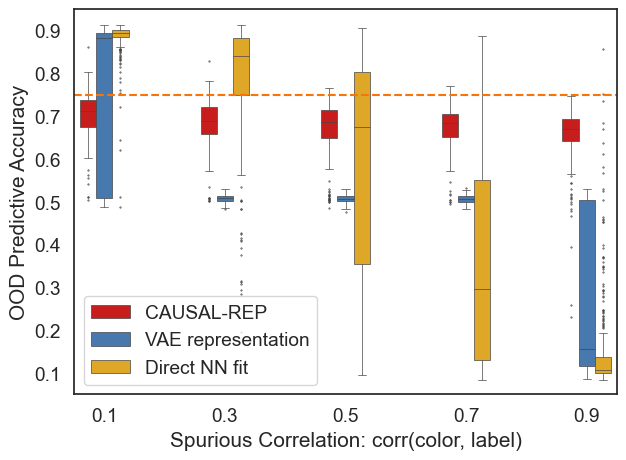

In [66]:
plt.figure(figsize=(7,5))

g = sns.boxplot(x='spurious_corr', \
                y="acc", \
                hue="method", \
                data=supervised_coloredmnist_dim64_expand, \
                palette=[colors[2], colors[1], colors[3]], \
                order=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], \
                linewidth=0.5, fliersize=0.5)
g.set(xticklabels=['0.1','', '0.3', '', '0.5', '', '0.7', '', '0.9'])
g.set(ylim=(0.05,0.95))
ax = g.axes
ax.axhline(0.75, ls='--',color=colors[6])
g.set(xlabel='Spurious Correlation: corr(color, label)', ylabel='OOD Predictive Accuracy')
plt.legend(loc='lower left')
for t, l in zip(g.get_legend().texts, ['CAUSAL-REP', 'VAE representation', 'Direct NN fit']): t.set_text(l)
plt.savefig('supervised_coloredmnist_dim64.pdf')

In [67]:
supervised_coloredmnist_spurious90 = supervised_coloredmnist[supervised_coloredmnist['spurious_corr']==0.9]

In [68]:
supervised_coloredmnist_spurious90_expand = \
supervised_coloredmnist_spurious90.set_index(supervised_coloredmnist_spurious90['z_dim'])[[
'causalrep_test_accs', \
'naive_vae_test_accs', \
'naive_test_accs']].stack().reset_index().rename(columns={'level_1':'method',0:'acc'})

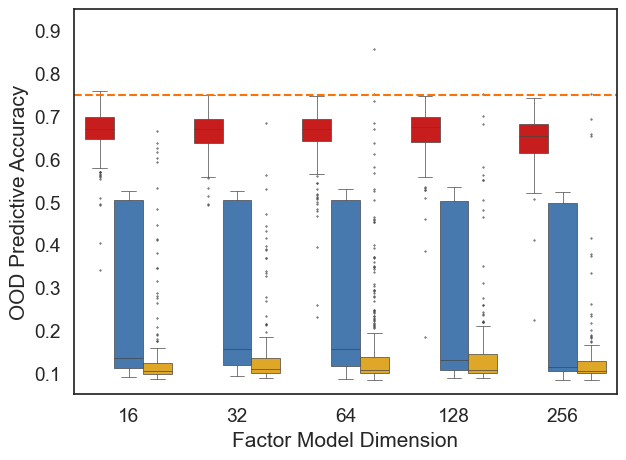

In [69]:
plt.figure(figsize=(7,5))

g = sns.boxplot(x='z_dim', \
                y="acc", \
                hue="method", \
                data=supervised_coloredmnist_spurious90_expand, \
                palette=[colors[2], colors[1], colors[3]], \
#                 order=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], \
                linewidth=0.5, fliersize=0.5)
# g.set(xticklabels=['0.1','', '0.3', '', '0.5', '', '0.7', '', '0.9'])
g.set(ylim=(0.05,0.95))
ax = g.axes
ax.axhline(0.75, ls='--',color=colors[6])
g.set(xlabel='Factor Model Dimension', ylabel='OOD Predictive Accuracy')
g.get_legend().remove()
# plt.legend(loc='upper left')
# plt.legend()
# for t, l in zip(g.get_legend().texts, ['CAUSAL-REP', 'VAE representation', 'Direct NN fit']): t.set_text(l)
plt.savefig('supervised_coloredmnist_spurious90.pdf')

In [70]:
unsupervised_coloredmnist_expand = \
unsupervised_coloredmnist.set_index(unsupervised_coloredmnist['spurious_corr'])[[
'causalrep_testood_accs', \
'naive_vae_testood_accs', \
'naive_testood_accs',\
'naive_contrastive_testood_accs']].stack().reset_index().rename(columns={'level_1':'method',0:'acc'})

/var/folders/h3/mg_n_0ls7kgb1369wvkmb_dh0000gq/T/ipykernel_55398/1304295840.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(xticklabels=['0.1', '0.3', '0.5', '0.7', '0.9'])


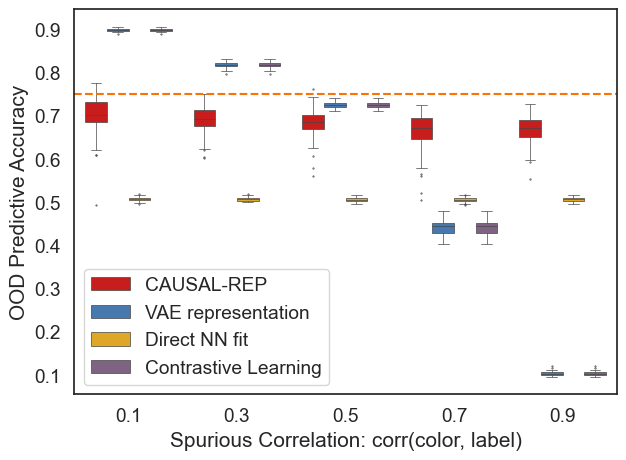

In [71]:
plt.figure(figsize=(7,5))
g = sns.boxplot(x='spurious_corr', \
                y="acc", \
                hue="method", \
                data=unsupervised_coloredmnist_expand, \
                palette=[colors[2], colors[1], colors[3], colors[5]], \
                order=[0.1, 0.3, 0.5, 0.7, 0.9], \
                linewidth=0.5, fliersize=0.5)
g.set(xticklabels=['0.1', '0.3', '0.5', '0.7', '0.9'])
# g.set(ylim=(-1,1))
ax = g.axes
ax.axhline(0.75, ls='--',color=colors[6])
plt.legend(loc='lower left')
g.set(xlabel='Spurious Correlation: corr(color, label)', ylabel='OOD Predictive Accuracy')
for t, l in zip(g.get_legend().texts, ['CAUSAL-REP', 'VAE representation', 'Direct NN fit', 'Contrastive Learning']): t.set_text(l)
plt.savefig('unsupervised_coloredmnist.pdf')